**UNIVERSIDADE DE SÃO PAULO (USP)**

**_Author_**: Carlos Filipe de Castro Lemos

**_Academy Study_**: Exploring Numerical Data

# Packages

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Loading Dataset

Dataset (base): 

the original data was modified, but the origin is https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [70]:
path = "./data/credit_data.csv"
df = pd.read_csv(path)


# Looking at Dataset

In [71]:
df.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [72]:
df.tail(10)

,clientid,income,age,loan,default
1990,1991,34237.575419,34.101654,2658.090632,0
1991,1992,26300.446554,45.539385,2317.393678,0
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [74]:
df.duplicated().sum()

0

In [75]:
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

# Looking at variables

In [76]:
for c in df.columns:
    unique, counting = np.unique(df[c], return_counts=True)
    print(c, ": size", len(unique), unique, counting)

clientid : size 2000 [   1    2    3 ... 1998 1999 2000] [1 1 1 ... 1 1 1]
income : size 2000 [20014.48947005 20063.09958408 20111.36325775 ... 69958.70554121
 69992.33271228 69995.68557832] [1 1 1 ... 1 1 1]
age : size 1998 [-52.42327992 -36.49697551 -28.21836132 ...  63.93073469  63.97179584
          nan] [1 1 1 ... 1 1 3]
loan : size 2000 [1.37762959e+00 8.01207625e+00 1.54985984e+01 ... 1.33767977e+04
 1.34434732e+04 1.37660512e+04] [1 1 1 ... 1 1 1]
default : size 2 [0 1] [1717  283]


clientid: primary key

income: distribution

age: distribution

loan: distribution

default (target): binary

# Statistics

In [77]:
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


Ok. It's difficult to believe -52.42 as age. Let's check better and drop the errors.

In [78]:
print(df.loc[df['age'] < 0])
index_to_delete = df.loc[df['age'] < 0].index
print(index_to_delete)
df = df.drop(index_to_delete)
df

    clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0
Index([15, 21, 26], dtype='int64')


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


About default.

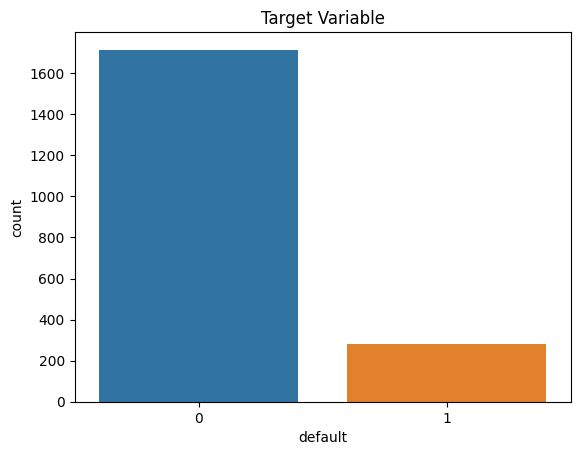

In [79]:
sns.countplot(x = df['default'])
plt.title("Target Variable")
plt.show()

Distribution of income.

<Axes: xlabel='income', ylabel='Count'>

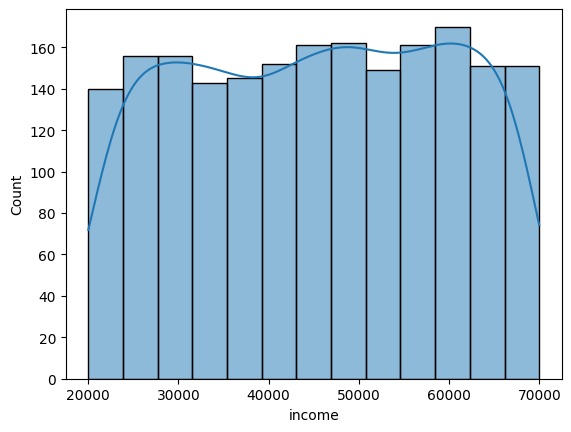

In [80]:
sns.histplot(df['income'], kde=True)

Distribution of age.

<Axes: xlabel='age', ylabel='Count'>

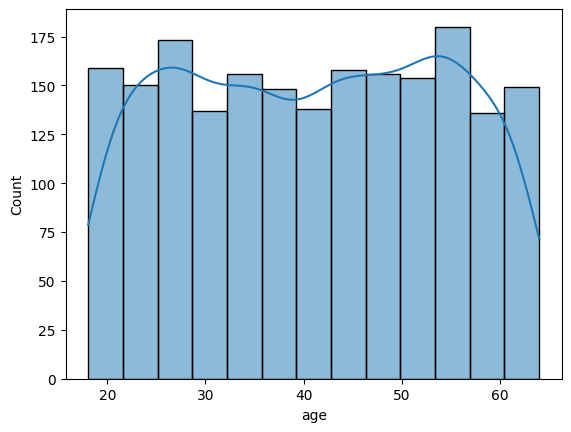

In [81]:
sns.histplot(df['age'], kde=True)

Distribution of loan.

<Axes: xlabel='loan', ylabel='Count'>

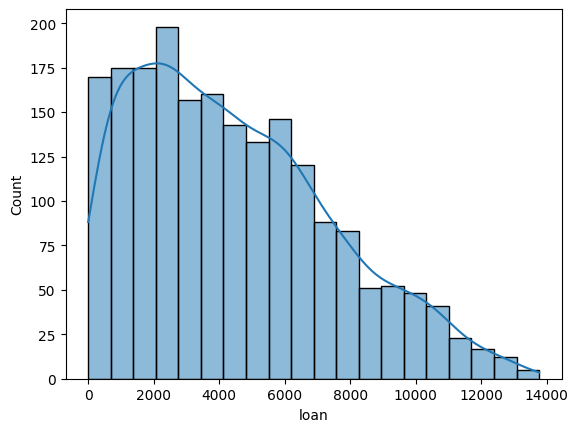

In [82]:
sns.histplot(df['loan'], kde=True)

Text(0.5, 1.0, 'Comparison of Distributions')

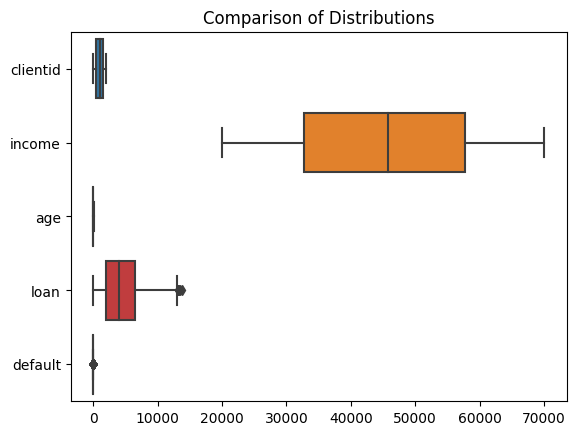

In [87]:
sns.boxplot(df, orient='h')
plt.title("Comparison of Distributions")

The data is in different scales.